In [18]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import tqdm
from functools import partial
from multiprocessing import Pool
sys.path.append('/home/hcleroy/PostDoc/Simulation/Aging_Condensates/Gillespie_backend/')
import Gillespie_backend as backend
sys.path.append('/home/hcleroy/Extra_Module_py/')
from formated_matplotlib import *

In [3]:
ell_tot = 200.
rho0 = 0.001
teq = 100

Nstat = 500

In [44]:
def get_mean_distance(ell_tot,rho0,Nstat):
    distances = np.zeros(Nstat,dtype=float)
    for j in range(Nstat):
        S = backend.Gillespie(ell_tot,rho0,0.,seed=np.random.randint(100000))
        S.evolve()
        distances[j] = np.linalg.norm(S.get_R())
    return np.sqrt(ell_tot/2),np.mean(distances)

In [45]:
mean_distances = np.zeros((10,10,2),dtype=list)
for n,rho_amp in enumerate(np.linspace(0.01,0.5,10)):
    with Pool(10) as p:
        mean_distances[n] = p.starmap(partial(get_mean_distance,Nstat=500),zip(np.linspace(100,200,10),rho_amp/np.linspace(100,200,10)))
mean_distances = mean_distances.astype(float)

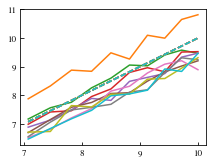

In [47]:
for i in range(1,10):
    plt.plot(mean_distances[i,:,0],mean_distances[i,:,1],color = ColorCycle[i])
    plt.plot(mean_distances[i,:,0],mean_distances[i,:,0],color = ColorCycle[i],linestyle = '--')